# K means clustering 

## Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')

In [2]:
Pune_df = pd.read_csv("/content/Pune_df.csv")

Pune_df.head()

,Neighborhood,Latitude,Longitude
0,Appa Balwant Chowk,18.516484,73.85387
1,"Aundh, Pune",18.563450,73.81227
2,Balewadi,18.576020,73.77983
3,Baner,18.548200,73.77316
4,Bavdhan,18.507470,73.78236


In [3]:
Pune_Supermarket = pd.read_csv("/content/Pune_Supermarket.csv") 

Pune_Supermarket.head()

,Unnamed: 0,Neighborhoods,Supermarket
0,0,Appa Balwant Chowk,0.01
1,1,"Aundh, Pune",0.00
2,2,Balewadi,0.00
3,3,Baner,0.00
4,4,Bavdhan,0.00


## Selecting the proper value of K

In [29]:
# As we know K-means algorithm is sensetive to value of k  
# Instead of using a fixed value of k lets decide an optimum value of K using Elbow Method 
clustering = Pune_Supermarket.drop(["Neighborhoods", "Unnamed: 0" ], 1)
from scipy.spatial.distance import cdist 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,5) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(clustering) 
    kmeanModel.fit(clustering)     
      
    distortions.append(sum(np.min(cdist(clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_

1 : 0.004814005154181109
2 : 0.0002629241726015928
3 : 6.56185919343829e-05
4 : 1.3798936740724601e-18


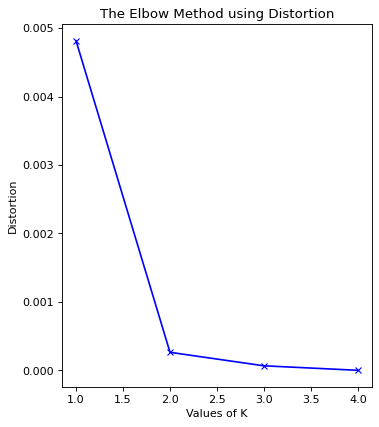

In [30]:

import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure 
figure(num=None, figsize=(5, 6), dpi=80, facecolor='w', edgecolor='k')
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [32]:

numberofclusters  = 2


# run k-means clustering
kmeans = KMeans(n_clusters=numberofclusters , random_state=2).fit(clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int32)

In [33]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
merged = Pune_Supermarket.copy()

# add clustering labels
merged["Cluster Labels"] = kmeans.labels_

merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
merged.head()

,Unnamed: 0,Neighborhood,Supermarket,Cluster Labels
0,0,Appa Balwant Chowk,0.01,1
1,1,"Aundh, Pune",0.00,0
2,2,Balewadi,0.00,0
3,3,Baner,0.00,0
4,4,Bavdhan,0.00,0


In [34]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
merged = merged.join(Pune_df.set_index("Neighborhood"), on="Neighborhood")

print(merged.shape)
merged.head() # check the last columns!

(55, 6)


,Unnamed: 0,Neighborhood,Supermarket,Cluster Labels,Latitude,Longitude
0,0,Appa Balwant Chowk,0.01,1,18.516484,73.85387
1,1,"Aundh, Pune",0.00,0,18.563450,73.81227
2,2,Balewadi,0.00,0,18.576020,73.77983
3,3,Baner,0.00,0,18.548200,73.77316
4,4,Bavdhan,0.00,0,18.507470,73.78236


In [35]:
# sort the results by Cluster Labels
print(merged.shape)
merged.sort_values(["Cluster Labels"], inplace=True)
merged

(55, 6)


,Unnamed: 0,Neighborhood,Supermarket,Cluster Labels,Latitude,Longitude
54,54,Yerawada,0.000000,0,18.569060,73.881590
21,21,Kharadi,0.000000,0,18.544620,73.939220
23,23,Kothrud,0.000000,0,18.505170,73.802450
24,24,List of neighbourhoods in Pune,0.000000,0,18.504230,73.852860
25,25,"Maan, Pune",0.000000,0,18.548000,73.901330
26,26,Magarpatta,0.000000,0,18.509270,73.932510
53,53,Wakad,0.000000,0,18.604000,73.750380
28,28,Manjri,0.000000,0,18.558740,73.987370
29,29,Marunji,0.000000,0,18.598790,73.735110
30,30,Megapolis Pune,0.000000,0,18.539830,73.833460


In [36]:
# create map
map_clusters = folium.Map(location=[18.521428, 73.8544541], zoom_start=11)

# set color scheme for the clusters
x = np.arange(numberofclusters)
ys = [i+x+(i*x)**2 for i in range(numberofclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [37]:

map_clusters.save('map_clusters.html')

In [38]:

merged.loc[merged['Cluster Labels'] == 0]

,Unnamed: 0,Neighborhood,Supermarket,Cluster Labels,Latitude,Longitude
54,54,Yerawada,0.0,0,18.56906,73.88159
21,21,Kharadi,0.0,0,18.54462,73.93922
23,23,Kothrud,0.0,0,18.50517,73.80245
24,24,List of neighbourhoods in Pune,0.0,0,18.50423,73.85286
25,25,"Maan, Pune",0.0,0,18.54800,73.90133
26,26,Magarpatta,0.0,0,18.50927,73.93251
53,53,Wakad,0.0,0,18.60400,73.75038
28,28,Manjri,0.0,0,18.55874,73.98737
29,29,Marunji,0.0,0,18.59879,73.73511
30,30,Megapolis Pune,0.0,0,18.53983,73.83346


In [39]:
merged.loc[merged['Cluster Labels'] == 1]

,Unnamed: 0,Neighborhood,Supermarket,Cluster Labels,Latitude,Longitude
42,42,"Shaniwar Peth, Pune",0.010000,1,18.518570,73.853600
45,45,"Somwar Peth, Pune",0.010000,1,18.520310,73.867680
48,48,Swargate,0.010000,1,18.499030,73.858430
44,44,"Shukrawar Peth, Pune",0.010000,1,18.503950,73.858100
41,41,"Sadashiv Peth, Pune",0.010000,1,18.511120,73.851500
0,0,Appa Balwant Chowk,0.010000,1,18.516484,73.853870
39,39,"Rasta Peth, Pune",0.010000,1,18.518310,73.865370
38,38,Pune Camp,0.010000,1,18.524590,73.878800
34,34,"Narayan Peth, Pune",0.010000,1,18.515300,73.849390
32,32,"Nana Peth, Pune",0.010000,1,18.515100,73.867870


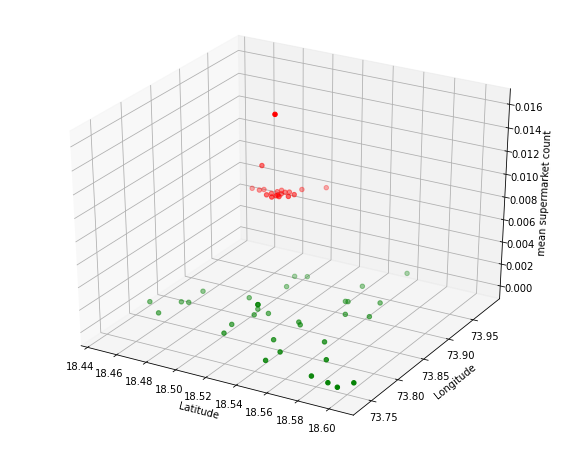

In [40]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

g_low = merged.loc[merged['Cluster Labels'] == 0]
g_high = merged.loc[merged['Cluster Labels'] == 1]

 
ax.scatter( g_low['Latitude'],g_low['Longitude'],g_low['Supermarket'] , color = 'g' )
ax.scatter( g_high['Latitude'],g_high['Longitude'],g_high['Supermarket'] , color = 'r' )

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('mean supermarket count')

plt.show()